In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data analytics intern/quotes_scraped.csv')
df.head()


,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [ ]:
# Shape & Columns
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")



Shape: (100, 3)
Columns: ['Quote', 'Author', 'Tags']


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Quote     0
Author    0
Tags      3
dtype: int64


In [ ]:
# Unique authors
print(f"\nUnique Authors: {df['Author'].nunique()}")
print(df['Author'].value_counts().head())




Unique Authors: 50
Author
Albert Einstein    10
J.K. Rowling        9
Marilyn Monroe      7
Dr. Seuss           6
Mark Twain          6
Name: count, dtype: int64


In [ ]:

from collections import Counter

all_tags = []

for row in df['Tags']:
    if pd.notna(row):  # ✅ Only split if it's NOT NaN
        all_tags.extend(row.split(', '))

tag_counts = Counter(all_tags)
print(tag_counts.most_common(10))

[('love', 14), ('inspirational', 13), ('life', 13), ('humor', 12), ('books', 11), ('reading', 7), ('friendship', 5), ('friends', 4), ('truth', 4), ('simile', 3)]


<ipython-input-16-6400fa7f5041>:19: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


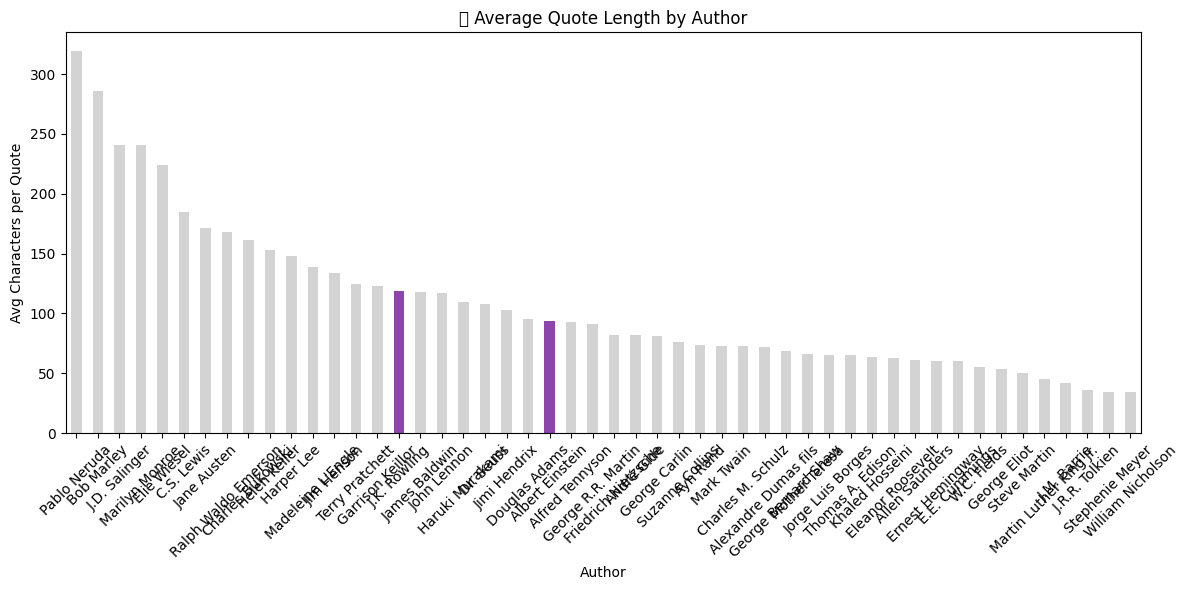

In [ ]:
import matplotlib.pyplot as plt

# Add a new column for quote length
df['Quote_Length'] = df['Quote'].apply(lambda x: len(x))

# Calculate average quote length per author
avg_lengths = df.groupby('Author')['Quote_Length'].mean().sort_values(ascending=False)

# Let's highlight Einstein & Rowling
highlight_authors = ['Albert Einstein', 'J.K. Rowling']

# Plot
plt.figure(figsize=(12, 6))
colors = ['#8e44ad' if author in highlight_authors else '#d3d3d3' for author in avg_lengths.index]
avg_lengths.plot(kind='bar', color=colors)
plt.title('📏 Average Quote Length by Author')
plt.ylabel('Avg Characters per Quote')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from collections import defaultdict

# Fill missing tags with empty string
df['Tags'] = df['Tags'].fillna('')

# Build a dictionary of authors to their tag sets
author_tags = defaultdict(set)

for _, row in df.iterrows():
    author = row['Author']
    tags = row['Tags'].split(', ')
    for tag in tags:
        if tag:
            author_tags[author].add(tag)

# Reverse map: tag ➡️ authors
tag_authors = defaultdict(set)

for author, tags in author_tags.items():
    for tag in tags:
        tag_authors[tag].add(author)

# Find tags used by only one author
exclusive_tags = {tag: list(authors)[0] for tag, authors in tag_authors.items() if len(authors) == 1}

# Print some exclusives
print("🔐 Tags that are exclusive to just one author:")
for tag, author in list(exclusive_tags.items())[:10]:  # limit output
    print(f"{tag} → {author}")


🔐 Tags that are exclusive to just one author:
knowledge → Albert Einstein
change → Albert Einstein
understand → Albert Einstein
live → Albert Einstein
fairy-tales → Albert Einstein
wisdom → Albert Einstein
understanding → Albert Einstein
success → Albert Einstein
mistakes → Albert Einstein
miracles → Albert Einstein
